In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

%matplotlib inline

In [2]:
imdbz = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt', delimiter='\t', header=None)

imdbz.columns = ['review', 'feels']

In [3]:
imdbz.head()

,review,feels
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
feato_feels = ['love', 'loved', 'loves', 'quality', 'fantastic', 'amazing',
               'incredible', 'recommend', 'impressive', 'winner', 'wonderful',
               'impressed', 'pleased', 'good', 'well', 'favorite', 'perfect', 'great',
               'worst', 'horrible', 'disappointing', 'disappointed', 'unfortunately']

for i in feato_feels:
    imdbz[str(i)] = imdbz.review.str.contains(str(i), case=False)

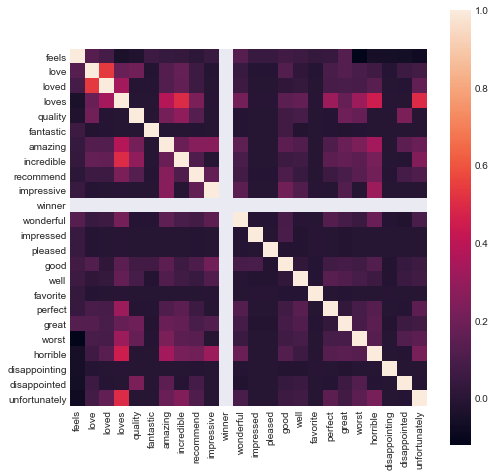

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.heatmap(imdbz.corr(), square=True);

In [6]:
rice = imdbz['feels']
corn = imdbz[feato_feels]

bern = BernoulliNB()
bern.fit(corn, rice)
y_corn = bern.predict(corn)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.5933333333333334
Sample: 0.6096256684491979
Mislabeled points out of 748: 292


In [8]:
cross_val_score(bern, corn, rice, cv=10)

array([0.55263158, 0.56578947, 0.61333333, 0.58666667, 0.62666667,
       0.58666667, 0.64864865, 0.62162162, 0.64864865, 0.60810811])

In [9]:
confusion_matrix(rice, y_corn)

array([[331,  31],
       [261, 125]], dtype=int64)

### Using the same features for the previous assignment, the scores are not surprisingly lower given that the amazon and yelp reviews are based on products and the imdb reviews reflect the opinions of films. The scores do seem consistent with the 20% holdout roughly 2% less than the sample, but overall seems one-sided towards negative reviews. The cross validation scores also show a 10% range of difference in accuracy. The next best course now is to iterate a new set of features and test the scores for a much better classifier for movie reviews.

In [10]:
imdbz.drop(imdbz.iloc[:, 2:], inplace=True, axis=1)

In [11]:
another_feels = ['good', 'perfect', 'masterpiece', 'love', 'strong',
                'predictable', 'short', 'wasted', 'crap', 'unrecommended']

for i in another_feels:
    imdbz[str(i)] = imdbz.review.str.contains(str(i), case=False)

In [12]:
rice = imdbz['feels']
corn = imdbz[another_feels]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.47333333333333333
Sample: 0.5508021390374331
Mislabeled points out of 748: 336


In [13]:
cross_val_score(bern, corn, rice, cv=10)

array([0.51315789, 0.48684211, 0.56      , 0.56      , 0.53333333,
       0.54666667, 0.51351351, 0.58108108, 0.47297297, 0.5       ])

In [14]:
confusion_matrix(rice, y_corn) 

array([[343,  19],
       [317,  69]], dtype=int64)

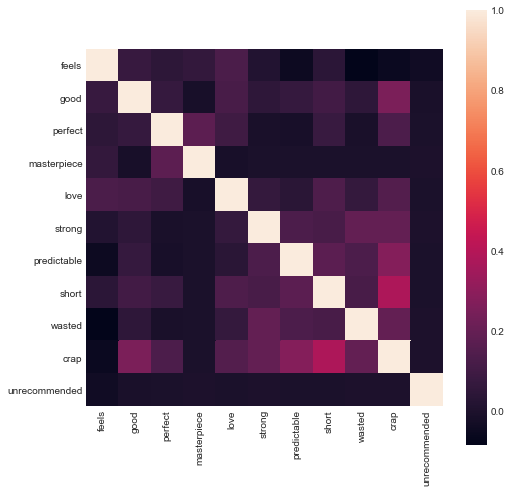

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(imdbz.corr(), square=True);

### My second classifier consists of 10 features so it is not surprisingly underfit. The holdout score is also near the lowest end of the cross validation. The holdout score is 8% less than the sample and 11% from the highest cross validation of 58%. With the cross validation scores jumping across an 11% gap, this set of features is not suitable for use beyond testing the effectiveness of the set of features and their correlation to the dataset. The confusion matrix also shows that these features are skewed towards negative reviews, so I will continue to try different feature words to compare the results. For the next sets of classifiers I will add more features to see how much the scores improve.

In [16]:
imdbz.drop(imdbz.iloc[:, 2:], inplace=True, axis=1)

In [17]:
another_feels2 = ['rocks', 'funny', 'talented', 'work', 'quality',
                 'mediocre', 'unfunny', 'lazy', 'worst', 'obvious',
                 'lovely', 'recommend', 'riveted', 'resounding', 'unpredictable',
                 'whatever', 'negative', 'pointless', 'regret', 'unnecessary']

for i in another_feels2:
    imdbz[str(i)] = imdbz.review.str.contains(str(i), case=False)

In [18]:
rice = imdbz['feels']
corn = imdbz[another_feels2]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.5333333333333333
Sample: 0.5467914438502673
Mislabeled points out of 748: 339


In [19]:
cross_val_score(bern, corn, rice, cv=10)

array([0.56578947, 0.5       , 0.54666667, 0.56      , 0.52      ,
       0.54666667, 0.51351351, 0.55405405, 0.54054054, 0.55405405])

In [20]:
confusion_matrix(rice, y_corn)

array([[ 36, 326],
       [ 13, 373]], dtype=int64)

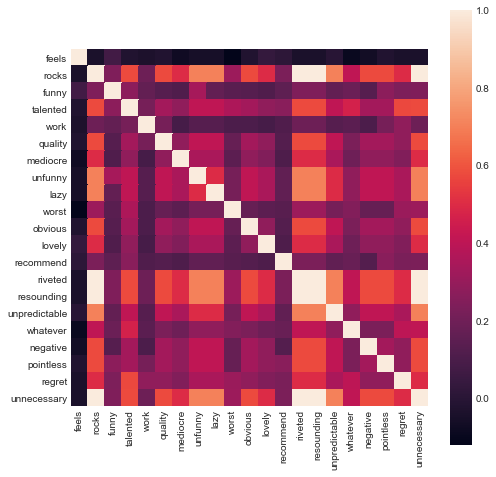

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(imdbz.corr(), square=True);

### Through experimentation I found that these features were highly correlated separately and also in combination so I decided to build a highly correlated feature set to see the results. The holdout score is only 1% less than the sample so it seems there is much more consistency in the results. But, by examining the cross validation, we see that there is a nearly 7% range from .5-.565%. Meaning that even with high correlation there are inconsistent scores with the data skewed towards classifying positive reviews.  Next we will try a new set of words with even more features that is much less correlated to see if the correlation matrix will not be skewed towards negative or positive classification.

In [22]:
imdbz.drop(imdbz.iloc[:, 2:], inplace=True, axis=1)

In [23]:
another_feels5 = ['pretty', 'terrific', 'touching', 'uplifting', 'joy',
                  'rocked', 'tremendously', 'imagination', 'incredibly', 'pleasant',
                  'liked', 'predict', 'interesting', 'superbly', 'classic',
                 'problem', 'frustration', 'lousy', 'boring', 'weaker',
                 'ineptly', 'stereotypically', 'whine', 'terrible', 'predictably',
                 'stupid', 'excruciatingly', 'disappointment', 'unsatisfactory', 'inexperience']

for i in another_feels5:
    imdbz[str(i)] = imdbz.review.str.contains(str(i), case=False)

In [24]:
rice = imdbz['feels']
corn = imdbz[another_feels5]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.5466666666666666
Sample: 0.5802139037433155
Mislabeled points out of 748: 314


In [25]:
cross_val_score(bern, corn, rice, cv=10)

array([0.57894737, 0.59210526, 0.6       , 0.58666667, 0.50666667,
       0.58666667, 0.58108108, 0.51351351, 0.5       , 0.54054054])

In [26]:
confusion_matrix(rice, y_corn) 

array([[ 59, 303],
       [ 11, 375]], dtype=int64)

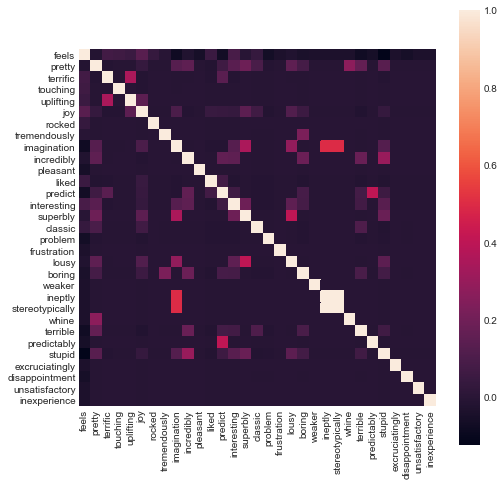

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(imdbz.corr(), square=True);

### This is a new set of words with 10 more features.  There is 25 less mislabeled points and the scores are slightly improved, but still skewed towards positive classification. There is also a slightly wider range between the holdout and sample scores. The cross validation range is also much wider from .5-.6%, so there is even more inconsistency in the results.   

In [28]:
imdbz.drop(imdbz.iloc[:, 2:], inplace=True, axis=1)

In [29]:
another_feels9 = ['fantastic', 'amazing', 'recommend', 'impressive', 'wonderful', 
                  'impressed', 'pleased', 'well', 'favorite', 'great',
                  'rocks', 'funny', 'talented', 'work', 'quality',
                  'liked', 'predict', 'interesting', 'superbly', 'classic',
                  'storytelling', 'teaches', 'excellent', 'performance', 'incredible',
                  'pretty', 'terrific', 'touching', 'uplifting', 'joy',
                  'good', 'perfect', 'masterpiece', 'love', 'strong',
                  'rocked', 'tremendously', 'imagination', 'incredibly', 'pleasant',
                'predictable', 'short', 'wasted', 'crap', 'unrecommended']

for i in another_feels9:
    imdbz[str(i)] = imdbz.review.str.contains(str(i), case=False)

In [30]:
rice = imdbz['feels']
corn = imdbz[another_feels9]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.6266666666666667
Sample: 0.6871657754010695
Mislabeled points out of 748: 234


In [31]:
cross_val_score(bern, corn, rice, cv=10)

array([0.60526316, 0.61842105, 0.69333333, 0.70666667, 0.76      ,
       0.62666667, 0.63513514, 0.64864865, 0.67567568, 0.7027027 ])

In [32]:
confusion_matrix(rice, y_corn) #48.7% positive classification

array([[326,  36],
       [198, 188]], dtype=int64)

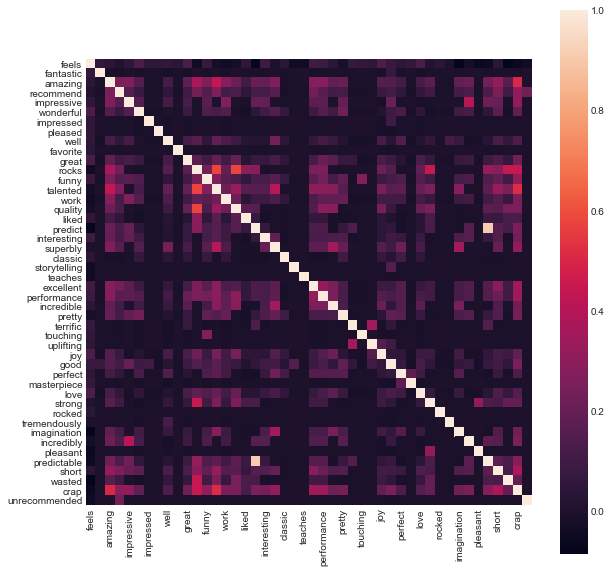

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(imdbz.corr(), square=True);

### This is my fifth feature set, this time I combined elements from the other classifiers such as the features I deemed correlated with negative classification in my second feature set and applied the words I deemed correlated with positive classification. Because the nature of my feature sets seem more likely to be skewed towards positive I used the negative features that skewed my correlation matrix toward negative classification. From there I added only the words that seemed related with skewing my correlation towards positive. The result is 45 features with 5 negative and 40 positive with the highest scores so far. The other feature sets did not reach a score above 60 besides the first feature set that I used for the previous assignment. But, the holdout score is 6% less than the sample and the range between the cross validation scores is 16%. This seems to perform the best with one fold reaching 76%, but this inconsistency is definitely a sign of overfitting which I will prove by testing on the Amazon and Yelp datasets. The features that were the most impactful to performance seem to be ['predictable', 'short', 'wasted', 'crap', 'unrecommended'], because these seem to be the only negative words out of the 45 and they still skewed my classifier towards negative reviews as seen in my confusion matrix.

In [34]:
amazing = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt', delimiter='\t', header=None)
bark = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/t_direct/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None)

amazing.columns = ['review', 'feels']
bark.columns = ['review', 'feels']

In [35]:
another_feeling = ['fantastic', 'amazing', 'recommend', 'impressive', 'wonderful', 
                  'impressed', 'pleased', 'well', 'favorite', 'great',
                  'rocks', 'funny', 'talented', 'work', 'quality',
                  'liked', 'predict', 'interesting', 'superbly', 'classic',
                  'storytelling', 'teaches', 'excellent', 'performance', 'incredible',
                  'pretty', 'terrific', 'touching', 'uplifting', 'joy',
                  'good', 'perfect', 'masterpiece', 'love', 'strong',
                  'rocked', 'tremendously', 'imagination', 'incredibly', 'pleasant',
                'predictable', 'short', 'wasted', 'crap', 'unrecommended']

for a in another_feeling:
    amazing[str(a)] = amazing.review.str.contains(str(a), case=False)
    
for b in another_feeling:
    bark[str(b)] = bark.review.str.contains(str(b), case=False)

In [36]:
rice = amazing['feels']
corn = amazing[another_feeling]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.725
Sample: 0.719
Mislabeled points out of 1000: 281


In [37]:
cross_val_score(bern, corn, rice, cv=10)

array([0.8 , 0.75, 0.77, 0.73, 0.69, 0.67, 0.68, 0.63, 0.76, 0.63])

In [38]:
confusion_matrix(rice, y_corn) #57.6% positive classification

array([[431,  69],
       [212, 288]], dtype=int64)

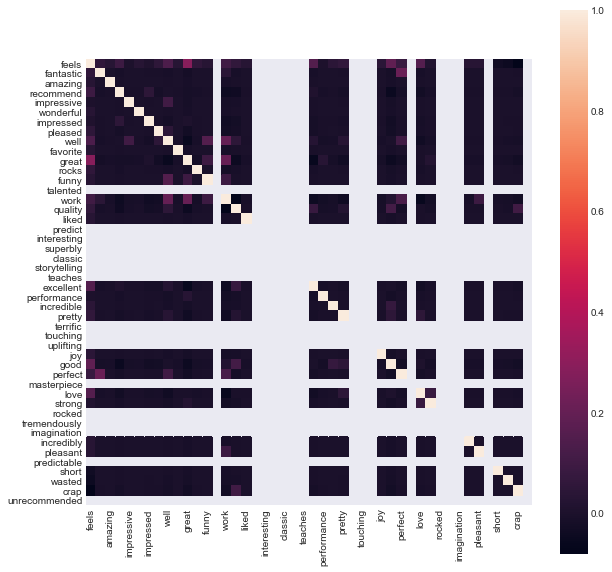

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(amazing.corr(), square=True);

In [40]:
rice = bark['feels']
corn = bark[another_feels9]
bern.fit(corn, rice)
y_corn = bern.predict(corn)

X_train, X_test, y_train, y_test = train_test_split(corn, rice, test_size=0.2)
print('20% Holdout: ' + str(bern.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(bern.fit(corn, rice).score(corn, rice)))
print("Mislabeled points out of {}: {}".format(
    corn.shape[0], (rice != y_corn).sum()))

20% Holdout: 0.715
Sample: 0.701
Mislabeled points out of 1000: 299


In [41]:
cross_val_score(bern, corn, rice, cv=10)

array([0.63, 0.69, 0.68, 0.75, 0.66, 0.66, 0.66, 0.7 , 0.7 , 0.71])

In [42]:
confusion_matrix(rice, y_corn) #46.6% positive classification

array([[468,  32],
       [267, 233]], dtype=int64)

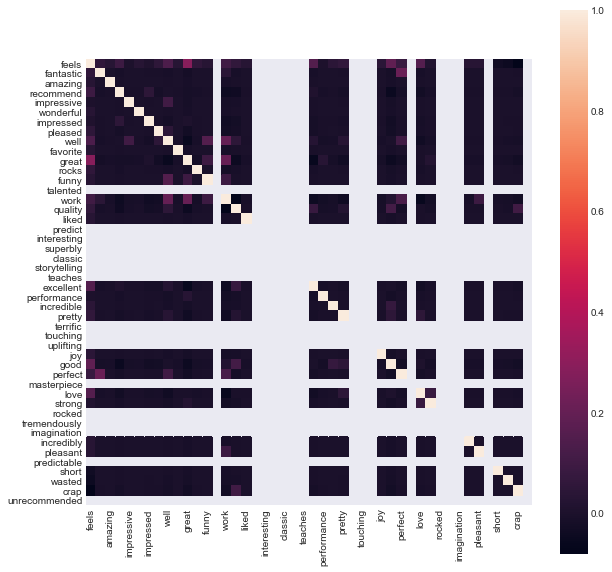

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(amazing.corr(), square=True);

### It is surprising to see that my last feature set actually performed much better on both Amazon and Yelp compared with Imdb, but there are alot of highly correlated features. I'm excited that both crossed 70% in holdout and sample scores, but the cross validation is still very inconsistent with Amazon ranging from .63-.8% and Yelp .63-.75%. Both Imdb and Yelp are near 50% in positive classification with high scores for negative. But Amazon reached the highest score from the opposing classification by reaching 57.6%. After speaking with my mentor we agree that the feature set could be improved by adding much more positive features or to continue experimenting to find the positive features that would help even out the scores. Much more experimentation would be involved using this method so the best course of action is to learn a better method to obtain a much better feature set. 